In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [45]:
df= pd.read_csv('Rwanda_Maize_Production_2018.csv')
df


,District,S A Production (Ton),S B Production (Ton),Total Production (Ton)
0,Nyarugenge,374,275,649
1,Gasabo,"4,851",1797,"6,648"
2,Kicukiro,"1,570",504,"2,074"
3,Nyanza,"7,875",2495,"10,370"
4,Gigasara,"16,057",1922,"17,979"
5,Nyaruguru,"4,613",453,"5,066"
6,Huye,"4,305",644,"4,949"
7,Nyamagabe,"2,909",966,"3,875"
8,Ruhango,"1,898",962,"2,860"
9,Muhanga,"2,064",458,"2,522"


In [46]:
df.drop(index=30, inplace = True)

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   District                30 non-null     object
 1    S A Production (Ton)   30 non-null     object
 2   S B Production (Ton)    30 non-null     int64 
 3   Total Production (Ton)  30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB
None


In [48]:
print(df.head())

     District  S A Production (Ton)   S B Production (Ton)  \
0  Nyarugenge                    374                   275   
1      Gasabo                  4,851                  1797   
2    Kicukiro                  1,570                   504   
3      Nyanza                  7,875                  2495   
4    Gigasara                 16,057                  1922   

  Total Production (Ton)  
0                    649  
1                  6,648  
2                  2,074  
3                 10,370  
4                 17,979  


In [49]:
print(df.tail())

    District  S A Production (Ton)   S B Production (Ton)  \
25   Gatsibo                 39,852                 12249   
26   Kayonza                 20,181                  5546   
27    Kirehe                 21,438                  4852   
28     Ngoma                 23,020                  1947   
29  Bugesera                 10,561                 13703   

   Total Production (Ton)  
25                 52,101  
26                 25,727  
27                 26,290  
28                 24,967  
29                 24,264  


In [50]:
# Check for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
District                  0
 S A Production (Ton)     0
S B Production (Ton)      0
Total Production (Ton)    0
dtype: int64


In [51]:
pd.options.mode.copy_on_write=True
df[" S A Production (Ton) "]=df[" S A Production (Ton) "].str.replace(",","").astype(float)
df["S B Production (Ton)"]=df["S B Production (Ton)"].astype(float)
df["Total Production (Ton)"]=df["Total Production (Ton)"].str.replace(",","").astype(float)
df

,District,S A Production (Ton),S B Production (Ton),Total Production (Ton)
0,Nyarugenge,374.0,275.0,649.0
1,Gasabo,4851.0,1797.0,6648.0
2,Kicukiro,1570.0,504.0,2074.0
3,Nyanza,7875.0,2495.0,10370.0
4,Gigasara,16057.0,1922.0,17979.0
5,Nyaruguru,4613.0,453.0,5066.0
6,Huye,4305.0,644.0,4949.0
7,Nyamagabe,2909.0,966.0,3875.0
8,Ruhango,1898.0,962.0,2860.0
9,Muhanga,2064.0,458.0,2522.0


In [52]:
# Calculate descriptive statistics for maize production
print(df.describe())


        S A Production (Ton)   S B Production (Ton)  Total Production (Ton)
count               30.000000             30.000000               30.000000
mean             11115.900000           3051.100000            14167.000000
std              11146.143036           4879.060045            15399.914433
min                374.000000            275.000000              649.000000
25%               4672.500000            641.000000             5349.500000
50%               7910.500000           1567.500000             9190.500000
75%              14668.000000           2510.000000            17668.500000
max              50793.000000          22787.000000            73580.000000


In [53]:
# Identify the top maize producing districts
top_producing_districts = df.sort_values(by='Total Production (Ton)', ascending=False)
print(top_producing_districts.head())


     District   S A Production (Ton)   S B Production (Ton)  \
24  Nyagatare                 50793.0               22787.0   
25    Gatsibo                 39852.0               12249.0   
27     Kirehe                 21438.0                4852.0   
26    Kayonza                 20181.0                5546.0   
28      Ngoma                 23020.0                1947.0   

    Total Production (Ton)  
24                 73580.0  
25                 52101.0  
27                 26290.0  
26                 25727.0  
28                 24967.0  


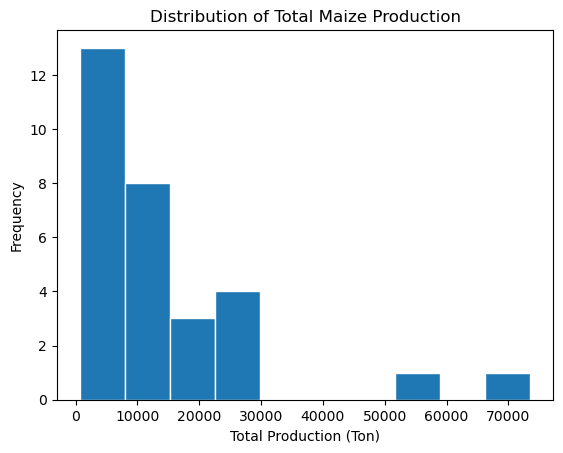

In [73]:
# Plotting the histogram
df['Total Production (Ton)'].plot(kind='hist', title='Distribution of Total Maize Production', edgecolor='white')
plt.xlabel('Total Production (Ton)')
plt.ylabel('Frequency')
plt.show()

Index(['Dist_ID', 'District', 'geometry'], dtype='object')


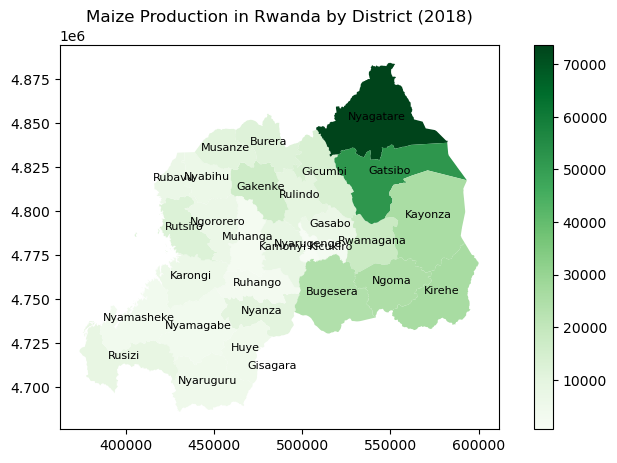

In [76]:
# Load Rwanda shapefile
rwanda_map = gpd.read_file('rwa_district/District.shp')

# Inspect the columns to make sure the column names are correct
print(rwanda_map.columns)
#print(df.columns)

# Ensure the data types are compatible
#print(rwanda_map['District'].dtype)
#print(df['District'].dtype)

# If necessary, convert the data types to match
rwanda_map['District'] = rwanda_map['District'].astype(str)
df['District'] = df['District'].astype(str)

# Merge the dataframes
#rwanda_map = rwanda_map.merge(df, left_on="District", right_on="District")
merged_data = rwanda_map.set_index('District').join(df.set_index('District'))

# Inspect the result
#print(rwanda_map.head())

# Plot the data
merged_data.plot(column='Total Production (Ton)', cmap='Greens', legend=True)
plt.title('Maize Production in Rwanda by District (2018)')
for idx, row in merged_data.iterrows():
   
    plt.annotate(row.name, xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')
    plt.subplots_adjust(left=0.9, right=2, bottom=0.1, top=0.9)
plt.show()


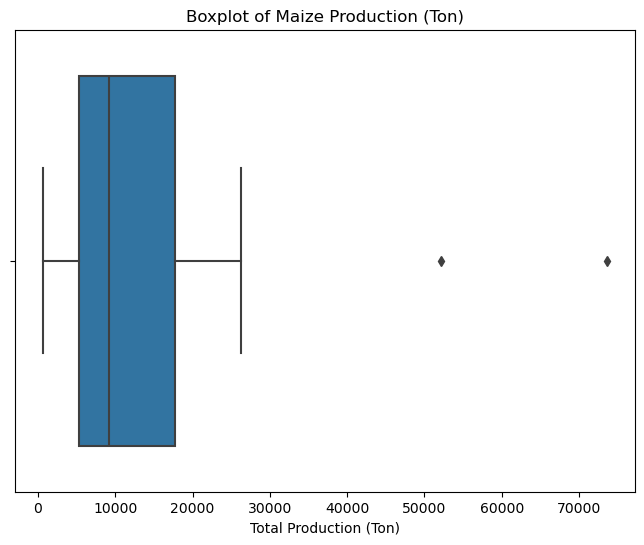

In [68]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total Production (Ton)'])
plt.title('Boxplot of Maize Production (Ton)')
plt.xlabel('Total Production (Ton)')
plt.show()